# Data Set Content
This dataset generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. Individual reports can be parsed by export session ID (column A) or timestamp (column B). Variation between output represents use of different types of Fitbit trackers and individual tracking behaviors / preferences.

Sourced from https://www.kaggle.com/datasets/arashnic/fitbit

# **Predictive Goal:**
- Predict (& visualize) if you are increasing your fitness and at what rate based on distance, minutes, total steps, and calories  

    - Potential adds to this concept:
        - create input field for goal tracking, ie: I want to run a 5k in 5 weeks, what should my rate of progress be, am I hitting it/on track?
        - customers can connect their fitbit and turn on the analytical feature, then track their progress on their dashboard

In [1]:
pip install seaborn==0.11.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import random
import os 
from sklearn.linear_model import LinearRegression
import datetime as dt
sns.set_theme() 

In [41]:
filename = os.path.join(os.getcwd(), "FitabaseData", "dailyActivity_merged.csv")
df = pd.read_csv(filename, header=0)

# **Data Exploration:**

In [42]:
df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [40]:
df.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


In [6]:
len(df["Id"].unique()) #33 unique users tracked 

33

In [8]:
df["Id"].value_counts() # days tracked ranges: 4, 18-31

1624580081    31
4319703577    31
2320127002    31
4020332650    31
1503960366    31
4388161847    31
7086361926    31
2026352035    31
1927972279    31
2022484408    31
1844505072    31
4702921684    31
4558609924    31
8053475328    31
8877689391    31
5553957443    31
4445114986    31
6962181067    31
8378563200    31
8583815059    31
2873212765    31
3977333714    30
5577150313    30
1644430081    30
8792009665    29
6290855005    29
6117666160    28
7007744171    26
6775888955    26
3372868164    20
8253242879    19
2347167796    18
4057192912     4
Name: Id, dtype: int64

In [9]:
df.shape #940 total data examples

(940, 15)

In [10]:
df_summ = df.describe(include = 'all')
df_summ

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
unique,NaN,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,4/15/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.855407e+09,NaN,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,NaN,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,NaN,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,NaN,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,NaN,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000


In [11]:
df["SedentaryActiveDistance"].unique()
# SedentaryActiveDistance does not contribute much value to the total distance feature
# WILL DROP 

array([0.  , 0.01, 0.02, 0.03, 0.05, 0.07, 0.04, 0.11, 0.1 ])

In [12]:
# Question: does LoggedActivitiesDistance get added into the TotalDistance. 
# If so, will drop
df["LoggedActivitiesDistance"].unique()

array([0.        , 1.95959604, 4.08169222, 2.78517509, 3.16782188,
       4.86978292, 4.85130692, 3.28541493, 4.9305501 , 4.94214201,
       4.92484093, 4.86179209, 4.88560486, 4.91114616, 2.83232594,
       4.91236782, 4.878232  , 2.25308108, 2.09214711])

In [13]:
# testing above question

df["test_total_distance"] = df["TrackerDistance"] + df["LoggedActivitiesDistance"] + df["VeryActiveDistance"] + df["ModeratelyActiveDistance"] + df["LightActiveDistance"] + df["SedentaryActiveDistance"]
total_diff_vals = df["test_total_distance"] == df["TotalDistance"]
total_diff_vals.value_counts()

# conclustion: 85 out of 940 have a different values between the app provided TotalDistance
# and the summed distance features I created. 

# due to time constraints, it's a low priority to understand the unique differnces between
# the distance features

# will use just total distance as the main distance feature for the analysis 


False    855
True      85
dtype: int64

In [14]:
# question: are TotalDistance and TrackerDistance the same values? 
# if so will drop TrackerDist

df["same_val_tot_dist"]= (df["TotalDistance"]==df["TrackerDistance"])

# answer: no there are some values that are not the same:
df[~df["same_val_tot_dist"]]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,test_total_distance,same_val_tot_dist
689,6962181067,4/21/2016,11835,9.71,7.88,4.081692,3.99,2.10,3.51,0.11,53,27,214,708,2179,21.671692,False
693,6962181067,4/25/2016,13239,9.27,9.08,2.785175,3.02,1.68,4.46,0.10,35,31,282,637,2194,21.125175,False
707,6962181067,5/9/2016,12342,8.72,8.68,3.167822,3.90,1.18,3.65,0.00,43,21,231,607,2105,20.577822,False
711,7007744171,4/12/2016,14172,10.29,9.48,4.869783,4.50,0.38,5.41,0.00,53,8,355,1024,2937,24.639782,False
712,7007744171,4/13/2016,12862,9.65,8.60,4.851307,4.61,0.56,4.48,0.00,56,22,261,1101,2742,23.101307,False
713,7007744171,4/14/2016,11179,8.24,7.48,3.285415,2.95,0.34,4.96,0.00,34,6,304,1096,2668,19.015415,False
717,7007744171,4/18/2016,14816,10.98,9.91,4.930550,3.79,2.12,5.05,0.02,48,31,284,1077,2832,25.820550,False
718,7007744171,4/19/2016,14194,10.48,9.50,4.942142,4.41,0.76,5.31,0.00,53,17,304,1066,2812,24.922142,False
719,7007744171,4/20/2016,15566,11.31,10.41,4.924841,4.79,0.67,5.86,0.00,60,33,347,1000,3096,26.654841,False
724,7007744171,4/25/2016,18229,13.34,12.20,4.861792,4.31,1.37,7.67,0.00,51,24,379,986,3055,30.411792,False


In [15]:
print(df[~df["same_val_tot_dist"]].shape)

#conclusion: do not use TrackerDistance as a feature. 
#            only 15 out of 940 are different in value
#            purpose/metric of TrackerDistance unknown at this time

(15, 17)


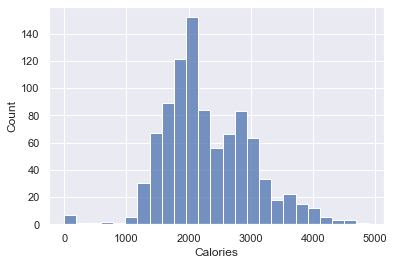

In [16]:
sns.histplot(data=df, x="Calories")

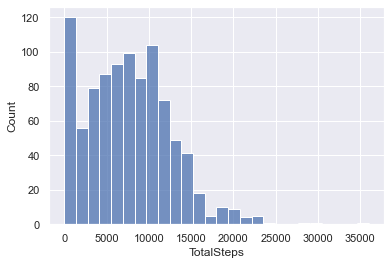

In [17]:
sns.histplot(data=df, x="TotalSteps")

Features I will use to analyze fitness progress:
  - TotalDistance
  - *TotalMinutes (to be created [will be combination of all minute features])
  - Calories (will use this to determine fitness progress on the asumption 
      that more calories burned == more energy exerted == more strenuous exercise)
  - Total Steps

# **Feature Engineering:**

In [18]:
# combining all minute features to create "total_minutes" feature
df["total_minutes"] = df["VeryActiveMinutes"] + df["FairlyActiveMinutes"] + df["LightlyActiveMinutes"]
df["total_minutes"]

0      366
1      257
2      222
3      272
4      267
      ... 
935    266
936    309
937    253
938    313
939    161
Name: total_minutes, Length: 940, dtype: int64

In [19]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,test_total_distance,same_val_tot_dist,total_minutes
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,16.99,True,366
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,13.94,True,257
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,13.49,True,222
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,12.51,True,272
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,16.32,True,267


list of features provided: 
'Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']

In [20]:
# creating df of features I will use and dropping rest


features_to_drop = ['same_val_tot_dist','TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 
                   'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 
                    'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'test_total_distance']


df_features = df.drop(columns = features_to_drop, axis = 1, inplace=False)


In [21]:
df_features.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,Calories,total_minutes
0,1503960366,4/12/2016,13162,8.50,1985,366
1,1503960366,4/13/2016,10735,6.97,1797,257
2,1503960366,4/14/2016,10460,6.74,1776,222
3,1503960366,4/15/2016,9762,6.28,1745,272
4,1503960366,4/16/2016,12669,8.16,1863,267
5,1503960366,4/17/2016,9705,6.48,1728,222
6,1503960366,4/18/2016,13019,8.59,1921,291
7,1503960366,4/19/2016,15506,9.88,2035,345
8,1503960366,4/20/2016,10544,6.68,1786,245
9,1503960366,4/21/2016,9819,6.34,1775,238


In [22]:
# converting the date data so it can be read as a number

df_features['Date'] = pd.to_datetime(df_features['ActivityDate'])
df_features['Date'] = df_features['Date'].map(dt.datetime.toordinal)
df_features.head()


,Id,ActivityDate,TotalSteps,TotalDistance,Calories,total_minutes,Date
0,1503960366,4/12/2016,13162,8.50,1985,366,736066
1,1503960366,4/13/2016,10735,6.97,1797,257,736067
2,1503960366,4/14/2016,10460,6.74,1776,222,736068
3,1503960366,4/15/2016,9762,6.28,1745,272,736069
4,1503960366,4/16/2016,12669,8.16,1863,267,736070


In [23]:
#drop the ActivityDate
df_features.drop(columns = 'ActivityDate', axis = 1, inplace=True)
df_features

,Id,TotalSteps,TotalDistance,Calories,total_minutes,Date
0,1503960366,13162,8.500000,1985,366,736066
1,1503960366,10735,6.970000,1797,257,736067
2,1503960366,10460,6.740000,1776,222,736068
3,1503960366,9762,6.280000,1745,272,736069
4,1503960366,12669,8.160000,1863,267,736070
...,...,...,...,...,...,...
935,8877689391,10686,8.110000,2847,266,736092
936,8877689391,20226,18.250000,3710,309,736093
937,8877689391,10733,8.150000,2832,253,736094
938,8877689391,21420,19.559999,3832,313,736095


# **Visualization Building**
### Goal is to create a visual for each feature a person would track
This demo picks a random user from the dataset and creates a linear regression for their progress thusfar


In [31]:
#randomly select user:

rand_user = random.choice(df_features['Id'])
rand_user

2026352035

In [32]:
# first I want to get a list of index values for NOT this user

index_list_for_user = df_features[df_features['Id'] != rand_user ].index
index_list_for_user # returns a list of index values in df_features for everyone BUT this user

# now I want to build a dataframe for just that user at those index values:
df_for_user = df_features.drop(index_list_for_user, inplace=False)
df_for_user

,Id,TotalSteps,TotalDistance,Calories,total_minutes,Date
185,2026352035,4414,2.74,1459,192,736066
186,2026352035,4993,3.10,1521,238,736067
187,2026352035,3335,2.07,1431,197,736068
188,2026352035,3821,2.37,1444,188,736069
189,2026352035,2547,1.58,1373,150,736070
190,2026352035,838,0.52,1214,60,736071
191,2026352035,3325,2.06,1419,182,736072
192,2026352035,2424,1.50,1356,141,736073
193,2026352035,7222,4.48,1667,327,736074
194,2026352035,2467,1.53,1370,153,736075


In [33]:
print(df_for_user.shape)

(31, 6)


### Calories Burned Over Time

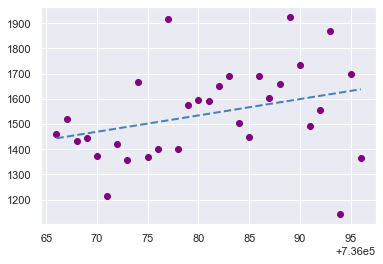

In [34]:
#define data
x = np.array(df_for_user['Date'])
y = np.array(df_for_user['Calories'])

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)


### Total Distance Per Day Over Time

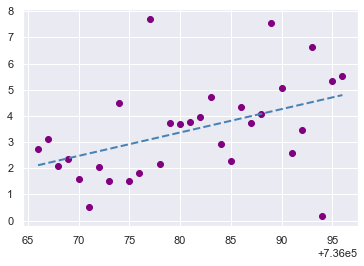

In [35]:
#define data
x = np.array(df_for_user['Date'])
y = np.array(df_for_user['TotalDistance'])

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

### Total Steps Per Day Over Time

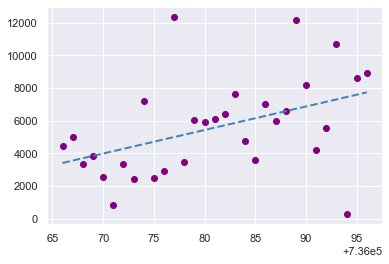

In [36]:
#define data
x = np.array(df_for_user['Date'])
y = np.array(df_for_user['TotalSteps'])

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

### Total Minutes of Activity Per Day Over Time

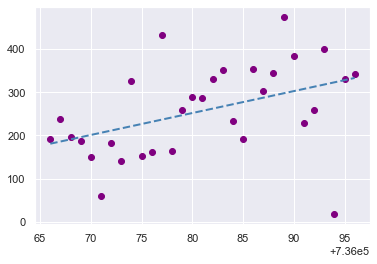

In [37]:
#define data
x = np.array(df_for_user['Date'])
y = np.array(df_for_user['total_minutes'])

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

## If I had more time
I would have liked to research how to implement Python Dash so that I could create a dashboard showing these visualizations in a more cohesive way

https://realpython.com/python-dash/